In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生成一组2次函数关系的数据，并且包含一定的噪音
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)

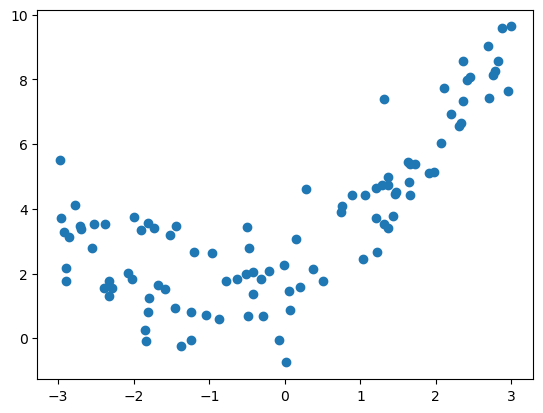

In [2]:
plt.scatter(x, y)
# 显然是非线性的关系
plt.show()

In [3]:
# 对这样的数据强行使用线性回归的算法来拟合的话
# 这就不分割测试数据/训练数据了
# 并且直接用模型对原始数据进行predict
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [4]:
y_predict = lin_reg.predict(X)

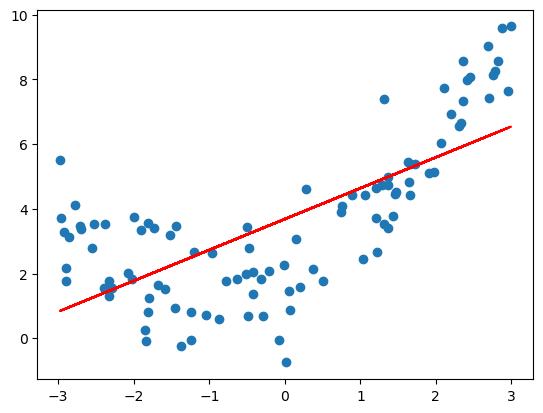

In [5]:
plt.plot(x, y_predict, color="r")
plt.scatter(x, y)
plt.show()

使用直线来拟合有弧度的曲线效果是不理想的

In [6]:
lin_reg.score(X, y)

0.4953707811865009

添加一个特征，使用多项式回归的思路

In [7]:
(X ** 2).shape

(100, 1)

In [8]:
X2 = np.hstack([X, X ** 2]) # 合并X于X的平方这两个矩阵
# 添加了新的特征：X ** 2

In [9]:
X2.shape

(100, 2)

In [10]:
line_reg2 = LinearRegression()
line_reg2.fit(X2, y)
lin_reg2_predict = line_reg2.predict(X2)

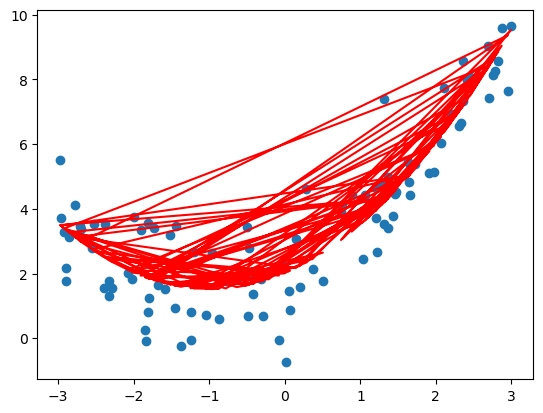

In [11]:
plt.plot(x, lin_reg2_predict, color="r") # 这样写生成的图是乱的，因为x是无序的，排序(从小到大)以后再plot就行
# plt.plot(np.sort(x), lin_reg2_predict[np.argsort(x)], color="r") 
plt.scatter(x, y)
plt.show()

修改一下代码，重新plot

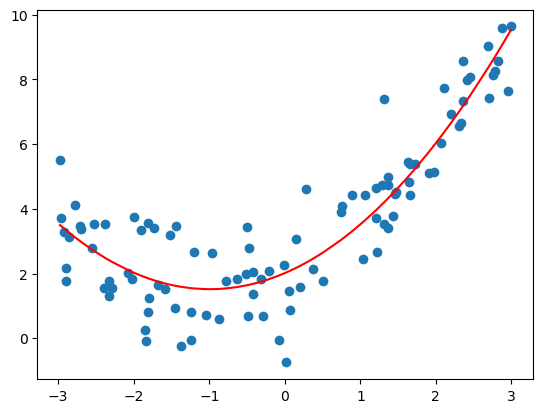

In [12]:
# plt.plot(x, lin_reg2_predict, color="r") # 这样写生成的图是乱的，因为x是无序的，排序(从小到大)以后再plot就行
plt.plot(np.sort(x), lin_reg2_predict[np.argsort(x)], color="r") 
plt.scatter(x, y)
plt.show()

添加新的特征以后，拟合程度更好了！

In [14]:
line_reg2.coef_ # 第一项是X的系数，第二项是X**2的系数，和人为指定的一致。

array([1.00211316, 0.50409402])